In [1]:
# !pip install fbprophet - install fbprophet library

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import fbprophet

np.random.seed(41)
fbprophet.__version__

'0.6'

# Loading Data

In [4]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-'
'files/ml-course/traffic.csv', parse_dates=['timestamp'])
df.head()

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


# Visualization Data

In [6]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic',
        width=950, height=500, template='plotly_dark', 
        color_discrete_sequence=['#42f5d4'])

In [7]:
px.scatter(df, x='timestamp', y='count',title='Anomaly Detection - web traffic',
           width= 950, height=500, template='plotly_dark',
           color_discrete_sequence=['#42f5d4'])

# Preprocesing Data

In [8]:
df.head(3)

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917


In [10]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917


# Prophet Model

In [0]:
from fbprophet import Prophet
Prophet?

In [13]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, 
                weekly_seasonality= False, interval_width=0.99,
                changepoint_range = 0.8)
model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [14]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-25 14:01:00,111.590807,132.708785,187.428637,111.590807,111.590807,48.878040,48.878040,48.878040,48.878040,48.878040,48.878040,0.0,0.0,0.0,160.468847
1,2018-09-25 14:02:00,111.592096,130.220390,191.671745,111.592096,111.592096,48.943001,48.943001,48.943001,48.943001,48.943001,48.943001,0.0,0.0,0.0,160.535097
2,2018-09-25 14:03:00,111.593385,135.449525,185.843557,111.593385,111.593385,49.004429,49.004429,49.004429,49.004429,49.004429,49.004429,0.0,0.0,0.0,160.597814


In [16]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,111.590807,160.468847,132.708785,187.428637
1,2018-09-25 14:02:00,111.592096,160.535097,130.220390,191.671745
2,2018-09-25 14:03:00,111.593385,160.597814,135.449525,185.843557


In [22]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,111.590807,132.708785,187.428637,111.590807,111.590807,48.878040,48.878040,48.878040,48.878040,48.878040,48.878040,0.0,0.0,0.0,160.468847,182.478,1
1,2018-09-25 14:02:00,111.592096,130.220390,191.671745,111.592096,111.592096,48.943001,48.943001,48.943001,48.943001,48.943001,48.943001,0.0,0.0,0.0,160.535097,176.231,1
2,2018-09-25 14:03:00,111.593385,135.449525,185.843557,111.593385,111.593385,49.004429,49.004429,49.004429,49.004429,49.004429,49.004429,0.0,0.0,0.0,160.597814,183.917,1


# Visulaization 

In [23]:
px.scatter(forecast, x='ds', y='real', color='anomaly', 
           color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series',
           template='plotly_dark', width=950, height=500)

In [24]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
15833,2018-10-06 13:54:00
15834,2018-10-06 13:55:00
15835,2018-10-06 13:56:00
15836,2018-10-06 13:57:00


In [25]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,160.468847,131.914402,187.603827
1,2018-09-25 14:02:00,160.535097,132.491876,186.130397
2,2018-09-25 14:03:00,160.597814,133.636374,188.401335
3,2018-09-25 14:04:00,160.656972,131.934837,192.910531
4,2018-09-25 14:05:00,160.712546,131.894527,188.712363


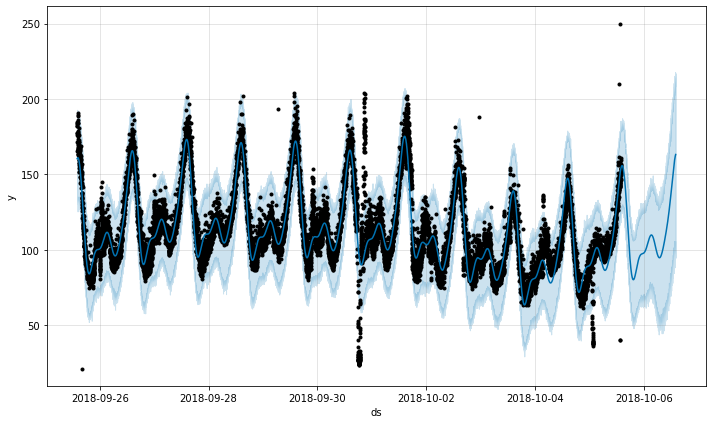

In [26]:
_ = model.plot(forecast)

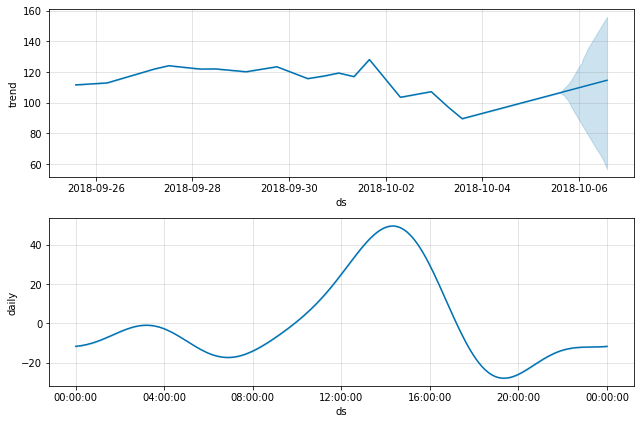

In [27]:
_ = model.plot_components(forecast)

In [28]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='time', ylabel='web traffic')

Output hidden; open in https://colab.research.google.com to view.

# Model - September

In [29]:
data_sep = df[df['timestamp'].dt.month ==9]
data_sep.columns=['ds','y']
data_sep.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [30]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False,
                weekly_seasonality=False, seasonality_mode='multiplicative',
                interval_width=0.99, changepoint_range=0.8)
model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,115.062749,165.385430,134.858474,194.678355
1,2018-09-25 14:02:00,115.047325,165.413429,134.632560,196.857028
2,2018-09-25 14:03:00,115.031901,165.437526,132.896710,193.128023


In [31]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,115.062749,134.858474,194.678355,115.062749,115.062749,0.437350,0.437350,0.437350,0.437350,0.437350,0.437350,0.0,0.0,0.0,165.385430,182.478,1
1,2018-09-25 14:02:00,115.047325,134.632560,196.857028,115.047325,115.047325,0.437786,0.437786,0.437786,0.437786,0.437786,0.437786,0.0,0.0,0.0,165.413429,176.231,1
2,2018-09-25 14:03:00,115.031901,132.896710,193.128023,115.031901,115.031901,0.438188,0.438188,0.438188,0.438188,0.438188,0.438188,0.0,0.0,0.0,165.437526,183.917,1


In [32]:
px.scatter(forecast, x='ds', y='real', color='anomaly', 
           color_continuous_scale='Bluyl', title='Anomaly Detection in Time'
           ' Series - September', template='plotly_dark', width=950, height=500)

In [33]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
9234,2018-10-01 23:55:00
9235,2018-10-01 23:56:00
9236,2018-10-01 23:57:00
9237,2018-10-01 23:58:00


In [34]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,165.385430,134.432248,195.622322
1,2018-09-25 14:02:00,165.413429,137.562011,195.817105
2,2018-09-25 14:03:00,165.437526,135.052506,196.214828
3,2018-09-25 14:04:00,165.457699,134.715172,196.410234
4,2018-09-25 14:05:00,165.473925,137.032323,196.102480


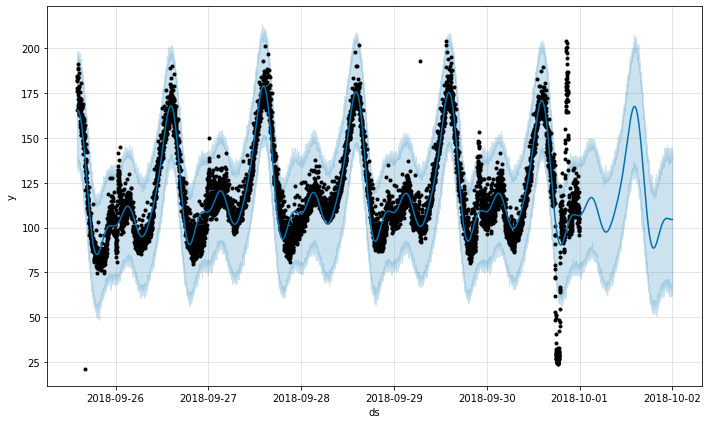

In [35]:
_ = model.plot(forecast)

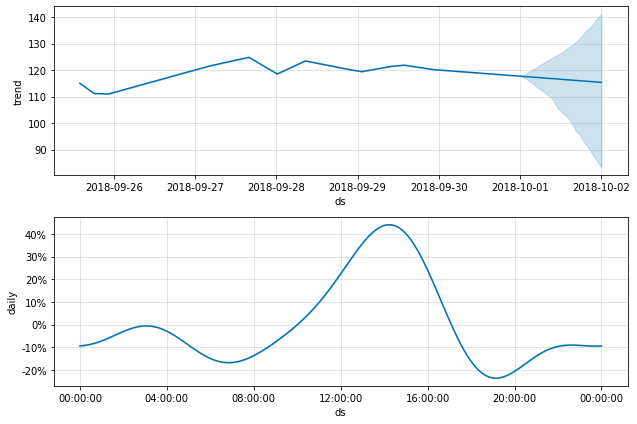

In [36]:
_ = model.plot_components(forecast)

In [37]:
plot_plotly(model, forecast, xlabel='time', ylabel='web traffic')